In this notebook, we will look at the Fourier transform and Wavelet transform of a few synthetic signals.

In [1]:
from scipy import signal
from scipy.fft import fft
import numpy as np
import scaleogram as scg
import matplotlib.pyplot as plt
%matplotlib inline

We define a simple utility function to help visualize the synthetic signals.

In [2]:
def ts_plot(t, ts, title="Time series"):
    """Plot a time series.
    
    Args:
        t (np.array): 1D array of the time steps
        ts (np.array): 1D array of the time series values
        title (str): Title of the plot
    """
    plt.plot(t, ts)
    plt.title(title)
    plt.xlabel("time")
    plt.ylabel("value")
    plt.show()  

## Fourier Transform

In [3]:
def ts_spectrogram(sig):
    """Compute and plot spectrogram of a signal.
    """
    f, t, Sxx = signal.spectrogram(sig)
    plt.pcolormesh(t, f, Sxx)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

### Single Sinusoidal Signal

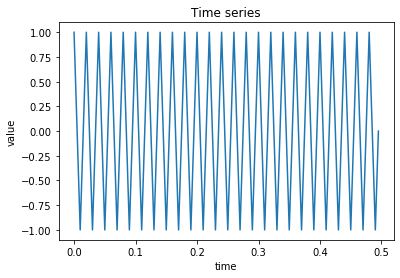

C:\Anaconda3\envs\ts_intro\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


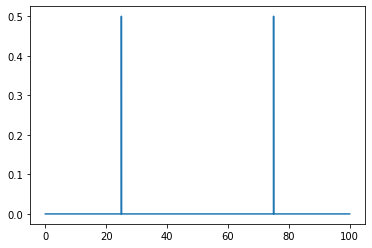

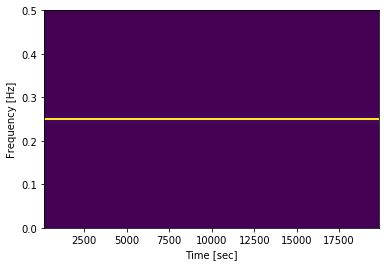

In [4]:
t = np.linspace(0, 100, 20000, endpoint=False)
sig  = np.cos(2 * np.pi * 50 * t) 

# Original time series
ts_plot(t[:100], sig[:100])

# Fourier transform
fftarray = fft(sig)
plt.plot(t, 1/20000 *fftarray)
plt.show()

# Spectrogram
ts_spectrogram(sig)

### Mixture of Two Sinusoidal Signals

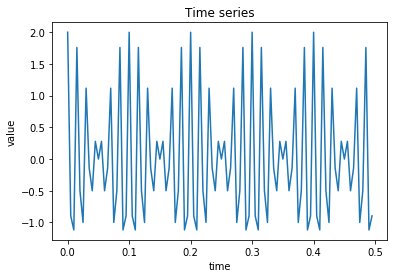

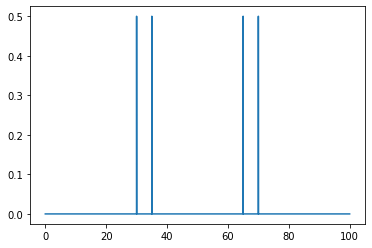

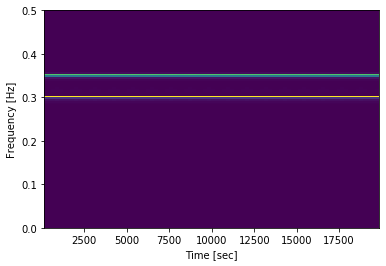

In [5]:
t = np.linspace(0, 100, 20000, endpoint=False)
sig  = np.cos(2 * np.pi * 60 * t) + np.cos(2 * np.pi * 70 * t)

ts_plot(t[:100], sig[:100])

fftarray = fft(sig)
plt.plot(t, 1/20000 *fftarray)
plt.show()

ts_spectrogram(sig)

## Wavelet Transform

In [6]:
def ts_wavelet(ts, width=64, mother_fun=signal.morlet2, time_extent=[-1,1], cmap="bwr", title="Scalogram", plot_scalogram=True):
    """Compute wavelet and scalogram of a time series. 
    
    Args:
        ts (array_like): input time series
        width (int): Maximum frequency
        mother_fun (function): Mother function. 
            Typical choices are signal.ricker and signal.morlet2.
        time_extent (list[int]): Range of time axis
        cmap (str): Colormap. For possible choices, see
            https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
        plot_scalogram (bool): Whether to plot the scalogram  
         
    Returns:
        Wavelet transform and scalogram as 2D numpy arrays
    """
    widths = np.arange(1, width)
    cwtmatr = signal.cwt(ts, mother_fun, widths)
    scalogram = np.square(abs(cwtmatr))
    if plot_scalogram:
        plt.imshow(scalogram, 
                   extent=[time_extent[0], time_extent[1], 1, width], 
                   cmap=cmap, 
                   aspect="auto",
                   vmax=scalogram.max(), 
                   vmin=scalogram.min())
        plt.xlabel("time")
        plt.ylabel("frequency")
        plt.colorbar()
        plt.title(title)
        plt.show()
    return cwtmatr, scalogram

### Single Sinusoidal Signal

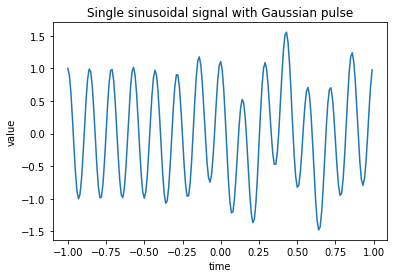

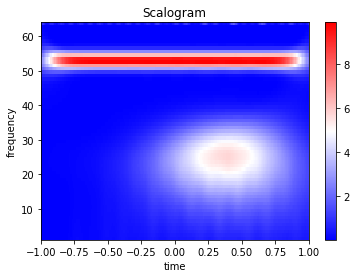

(array([[-0.43356113-0.60197491j, -0.9496901 -0.10779838j,
         -0.71989992+0.27664359j, ..., -0.13646568-0.42366652j,
         -0.52077389-0.37702593j, -0.87993715-0.01187616j],
        [-0.0058047 -0.29624972j,  0.16842834+0.19242982j,
         -0.1653333 -0.02683163j, ...,  0.08202632+0.04385125j,
         -0.1797569 +0.03486199j,  0.17430057-0.2134804j ],
        [-0.01627671-0.32670233j,  0.30573804-0.00966779j,
          0.00264083+0.25178766j, ..., -0.19957057+0.02125704j,
         -0.02193604-0.27240798j,  0.32678346-0.02007748j],
        ...,
        [ 0.03061121-0.07506836j,  0.0283189 -0.10178915j,
          0.02929375-0.12610989j, ...,  0.35371101-0.66250406j,
          0.41211769-0.63185863j,  0.4700475 -0.60451003j],
        [ 0.04376379-0.07829489j,  0.04531853-0.10574233j,
          0.04982253-0.13024235j, ...,  0.29903649-0.65227655j,
          0.35540443-0.62818106j,  0.41094192-0.60818978j],
        [ 0.05683111-0.07984156j,  0.06228731-0.10755185j,
          0.0

In [7]:
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + 0.6*signal.gausspulse(t - 0.4, fc=2)
ts_plot(t, sig, title="Single sinusoidal signal with Gaussian pulse")
ts_wavelet(sig)

In [8]:
help(scg.cws)

Help on function cws in module scaleogram.cws:

cws(time, signal=None, scales=None, wavelet=None, periods=None, spectrum='amp', coi=True, coikw=None, yaxis='period', cscale='linear', cmap='jet', clim=None, cbar='vertical', cbarlabel=None, cbarkw=None, xlim=None, ylim=None, yscale=None, xlabel=None, ylabel=None, title=None, figsize=None, ax=None)
    Build and displays the 2D spectrum for Continuous Wavelet Transform
    
    Call signatures::
    
        # build the CWT and displays the scaleogram
        ax = cws(signal)
        ax = cws(time, signal)
    
        # use a previously computed Continuous Wavelet Transform
        cwt = CWT(time, signal)
        ax  = cws(CWT)
    
    
    Arguments
    ----------
    
    - time : array of time/spatial domain locations
        Can be filled with signal values if this function is called with only
        one argument.
        This array should have a constant sampling rate for the spectrum to
        have sense. Missing time samples wi

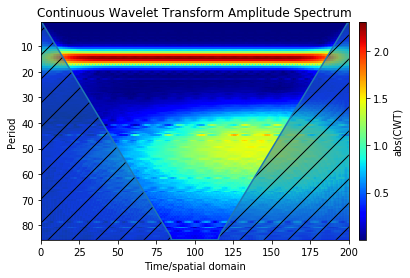

In [9]:
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + 0.6*signal.gausspulse(t - 0.4, fc=2)
scg.cws(sig, scales=np.arange(1, 128))

### Mixture of Two Sinusoidal Signals

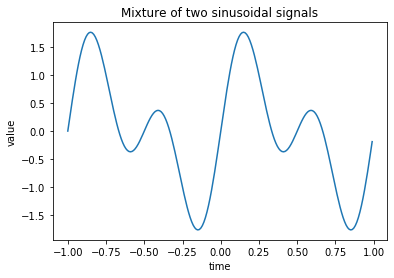

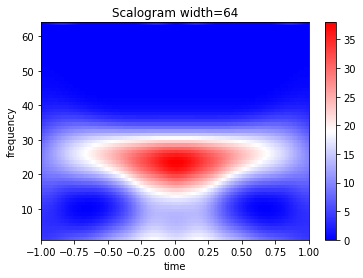

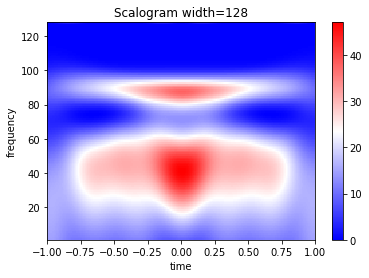

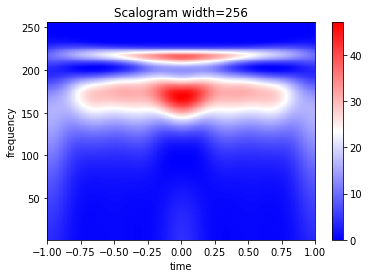

In [10]:
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.sin(2 * np.pi * t) +  np.sin(4 * np.pi * t)
#sig  = np.sin(4 * np.pi * t) +  np.sin(8 * np.pi * t)
ts_plot(t, sig, title="Mixture of two sinusoidal signals")
_, _ = ts_wavelet(sig, width=64, title="Scalogram width=64")
_, _ = ts_wavelet(sig, width=128, title="Scalogram width=128")
_, _ = ts_wavelet(sig, width=256, title="Scalogram width=256")

### Step Signal

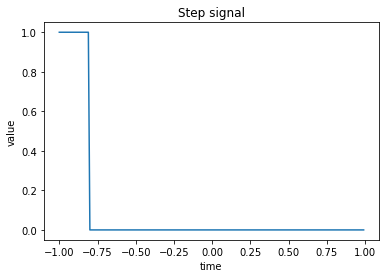

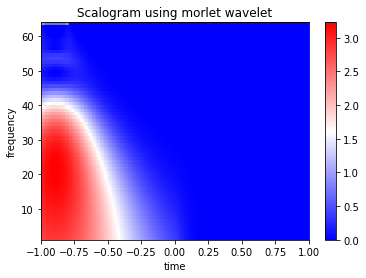

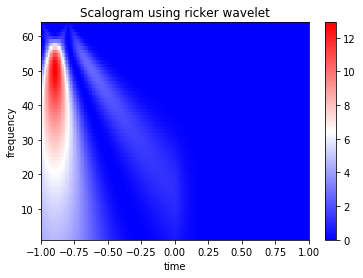

In [11]:
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.zeros(t.shape)
sig[:20] = 1
ts_plot(t, sig, title="Step signal")
_, _ = ts_wavelet(sig, mother_fun = signal.morlet2, title="Scalogram using morlet wavelet")
_, _ = ts_wavelet(sig, mother_fun = signal.ricker, title="Scalogram using ricker wavelet")

## Reference

[1] https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html <br/>
[2] https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html <br/>
[3] https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.cwt.html <br/>
[4] https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.morlet2.html <br/>
[5] https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html <br/>
[6] https://en.wikipedia.org/wiki/Spectrogram <br/>
[7] https://github.com/alsauve/scaleogram/blob/master/doc/El-Nino-Dataset.ipynb <br\>
[8] The wavelet scalogram in the study of time series: https://www.uv.es/vbolos/investigacion/pdf/proceeding_cedya2013_1.pdf